# FM synthesis!
show chart From Stefan Bilbao Numerical Sound Synthesis

git clone git@github.com:jacobjwebber/speak.git

This relies heavily on material from Stefan Bilbao's Numerical Sound Synthesis book.
### links
dexed website https://asb2m10.github.io/dexed/

samples page https://gwendal-lv.github.io/preset-gen-vae/

paper https://dafx2020.mdw.ac.at/proceedings/papers/DAFx20in21_paper_7.pdf

source https://github.com/gwendal-lv/preset-gen-vae

There are a range of ways of generating audio digitally.
Most simple is additive synthesis. Later followed by 

In [1]:
import torch
from math import pi
import IPython.display as ipd

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

## Additive sythesis

In [2]:
f_note = 440.
Fs = 22050
T = 4 #seconds

A = 1.
t = torch.linspace(0, T, int(T*Fs))
wave = A * torch.cos(t* 2*pi *f_note)
ipd.Audio(wave, rate=Fs)

In [3]:
harmonic = wave
hs = [.5, .3, .3, .3, .2]
for i, h in enumerate(hs):
    f_harmonic = f_note * (i+2)
    harmonic += h * torch.cos(t * 2*pi * f_harmonic)

ipd.Audio(harmonic, rate=Fs)

## Subtractive synthesis
Start with white noise or some other rich signal and filter it. Examples include STRAIGHT/WORLD where you start off with a glottal source pulse train and do a spectral envelope filter.

See also LPCNet

## Wavetable

Start with a stored periods worth of signal and repeat this at some give rate corresponding to the frequency of output.

## FM synthesis

Originated from CCRMA. Very simple computationally but produces wide range of rich sounds.



Patented and ended up being used in Yamaha DX7 -- the sound of the 80s https://www.youtube.com/watch?v=djV11Xbc914&ab_channel=a-ha  https://www.youtube.com/watch?v=8nHV2mOCIRA&ab_channel=CDJRose https://youtu.be/sTJ1XwGDcA4

Now cloned in software by Dexed

In [19]:
f_zero = f_note
f_one = f_note * 0.1
I = 0.8
fm_wave = torch.sin(2*pi*f_zero*t + I*torch.sin(2*pi*f_one*t))
ipd.Audio(fm_wave, rate=Fs)

# GNARLY!

fm_wave signal has components at frequencies $ f_{zero} + q * f_{one}$ for integer q

In [8]:
def plot(wave):
    D = librosa.stft(wave.numpy())  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure()
    librosa.display.specshow(S_db)
    plt.colorbar()

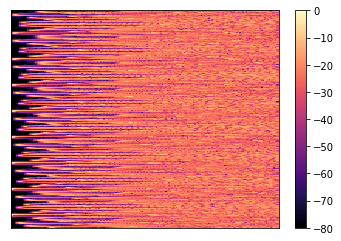

In [15]:
plot(fm_wave)

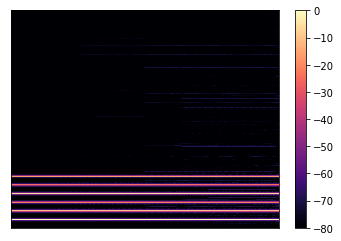

In [16]:
plot(harmonic)